In [5]:
# -*- coding: utf-8 -*-
"""
Created on %(date)s
@author: %(username)s
"""
#.............................................
# IMPORT STATEMENTS
#.............................................
#import time
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
#import scipy.signal as sig
import scipy.stats as stats
#import numpy.ma as ma
#import csv

import general_functions as gf
reload(gf)
gf.add_parent_dir_to_path()

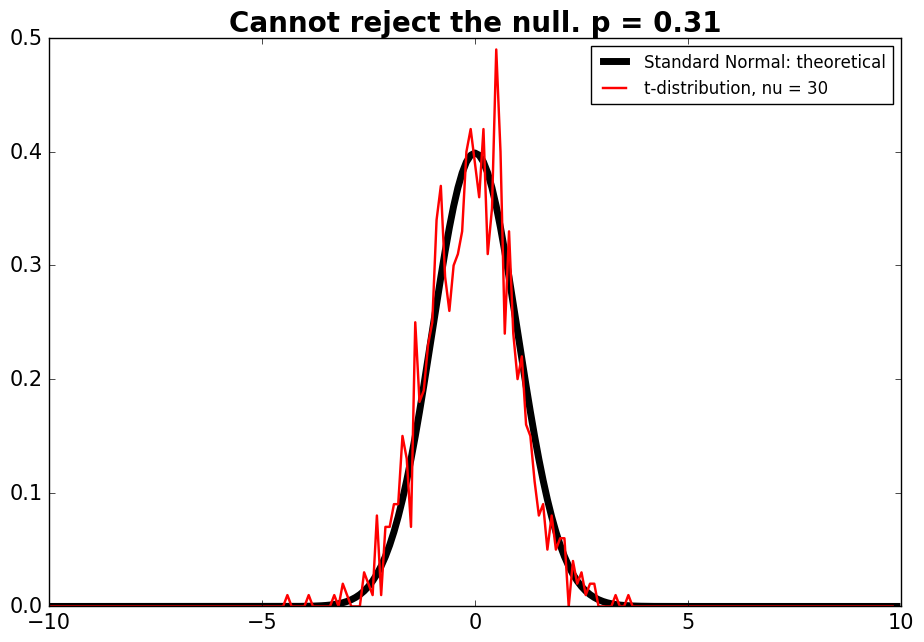

In [6]:
#.............................................
# INTIAL SETTINGS

#%% Compare 1 sample with TRUE normal
nu = 30
N = 1000

x = np.arange(-10,10,.1)
z = stats.norm.pdf(x,0,1)
x2 = stats.t.rvs(nu,size=N)

D, p = stats.kstest(x2,'norm')
#print(D,p)

gf.cfig(1)
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
hist, bin_edges = np.histogram(x2,x, density=True)
plt.plot(bin_edges[:-1],hist,color = 'red', label = 't-distribution, nu = ' + str(nu), linewidth = 1.75)

plt.legend(fontsize = 12)

if(p<0.05):
    plt.title('Reject the null. p = ' + str(gf.round_to_nearest(p, .001)))
else:
    plt.title('Cannot reject the null. p = ' + str(gf.round_to_nearest(p, .001)))

plt.show()

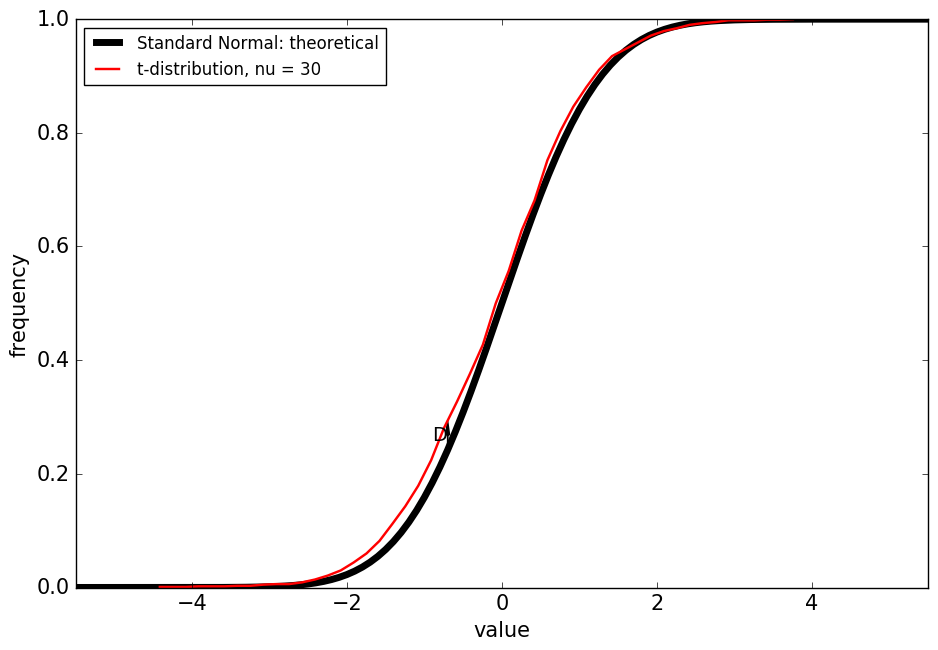

In [7]:
#%% show KS test at work

gf.cfig(2)
ax = plt.axes()
zc = stats.norm.cdf(x,0,1)

x2c = stats.cumfreq(x2, numbins = 50)
y = x2c.lowerlimit + np.linspace(0, x2c.binsize*x2c.cumcount.size,x2c.cumcount.size)

plt.plot(x,zc,color = 'black',label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(y,x2c.cumcount/len(x2),color = 'red', label = 't-distribution, nu = ' + str(nu), linewidth = 1.75)

# find location of biggest difference
# need to first interpolate to the same grid
xinterp = np.arange(-5,5,.1)
x2c_interp = np.interp(xinterp,y,x2c.cumcount/len(x2), right = 1.0)
zc_interp = np.interp(xinterp,x,zc,right = 1.0)

diff_vec = np.abs(x2c_interp - zc_interp)
i = np.argmax(diff_vec)

ax.arrow(xinterp[i],zc_interp[i],0.0,x2c_interp[i] - zc_interp[i], length_includes_head = True, head_width=0.05, head_length=0.025, fc='k', ec='k')
plt.text(xinterp[i-2],zc_interp[i] + (x2c_interp[i] - zc_interp[i])/3.,'D', fontsize = 14)

plt.xlim(-5.5,5.5)

plt.xlabel('value')
plt.ylabel('frequency')

plt.legend(fontsize = 12, loc = 'upper left')

plt.show()


# plot the difference between the two CDFs
#gf.cfig(4)
#plt.plot(xinterp,diff_vec)

#plt.show()

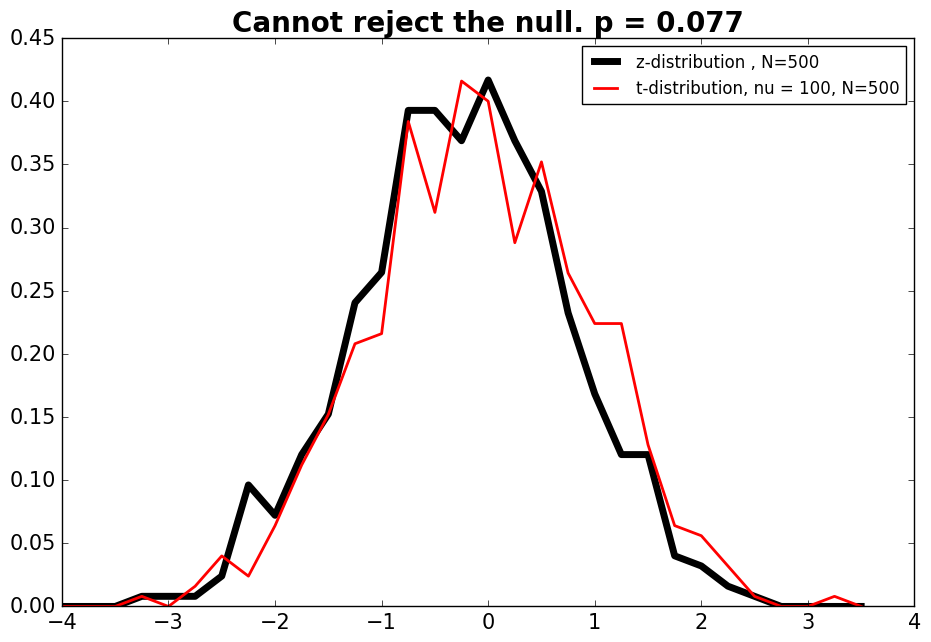

In [8]:
#%% compare TWO samples
N = 500

xint= np.arange(-4.,4.,.25)

nu = 100

x1 = np.random.normal(0.,1.,size=N)
x2 = stats.t.rvs(nu,size=N)

D, p = stats.ks_2samp(x2,x1)
#print(D,p)

gf.cfig(3)

hist, bin_edges = np.histogram(x1,xint, density=True)
plt.plot(bin_edges[:-1],hist,color = 'black', label = 'z-distribution '  +', N=' + str(N), linewidth = 5)

hist, bin_edges = np.histogram(x2,xint, density=True)
plt.plot(bin_edges[:-1],hist,color = 'red', label = 't-distribution, nu = ' + str(nu) +', N=' + str(N), linewidth = 2)

plt.legend(fontsize = 12)

if(p<0.05):
    plt.title('Reject the null. p = ' + str(gf.round_to_nearest(p, .001)))
else:
    plt.title('Cannot reject the null. p = ' + str(gf.round_to_nearest(p, .001)))


plt.show()